In Fundamentals of Data Visualization final project, I am going to analyze Global Terrorism Databse.  The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. You can find more important details on data collection methodology, definitions, and coding schema in GTD Codebook: https://www.start.umd.edu/gtd/downloads/Codebook.pdf.

# Step1 Brief description --- Task elicitation

**Why** is global terrorism database established? Global Terrorism is a serious threat to the international community.Terrorism is a threat that does not recognise borders and may affect states and peoples irrespective of their geographical location. Stable seemingly unaffected states and citizens residing in these areas are not an exception. Individuals and groups who believe that they can advance their political aims by using terror pose a serious threat to societies around the world and the rights and freedoms of citizens, especially by indiscriminately targeting innocent people.
Increasingly terrorists attack targets that are not well-protected places, or areas, and where an attack against a soft target would be the most devastating. These places include entertainment and recreational events and facilities, places of worship, tourist sites, airports and transport networks or links. Significant dates, anniversaries, public holidays, religious festivals and political events are all examples of places and times that have been targeted. Terrorists have also conducted attacks in response to international political or social developments, that they have considered being offensive.

**Definition is terrorism**: "The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

**Where**: Worldwide.

**Time period**: 1970-2017, except 1993.

**What** can we learn from the database? The coding decisions and classifications contained in the database are determined independently by START researchers and should not be interpreted as necessarily representing the official views or policies of the United States Government.

# Step2 Explorating data analysis
## 2.1 Import and clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = r'E:\Jia\Desktop\MS-DS\5304 Fundamentals of Data Visualization\week4\globalterrorismdb_0718dist.csv\globalterrorismdb_0718dist.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)

In [5]:
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data = data[['Year','Month','Day','Country','Region','city','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
data.head()

,Year,Month,Day,Country,Region,city,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   AttackType   181691 non-null  object 
 7   Killed       171378 non-null  float64
 8   Wounded      165380 non-null  float64
 9   Target       181055 non-null  object 
 10  Summary      115562 non-null  object 
 11  Group        181691 non-null  object 
 12  Target_type  181691 non-null  object 
 13  Weapon_type  181691 non-null  object 
 14  Motive       50561 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 20.8+ MB


Year -> This field contains the year in which the incident occurred.

Month -> This field contains the number of the month in which the incident occurred.

Day -> This field contains the numeric day of the month on which the incident occurred.

Country -> This field identifies the country or location where the incident occurred.

Region -> This field identifies the region in which the incident occurred.

City -> Name of the city, village, or town in which the incident occurred.

Attacktype -> This field captures the general method of attack and often reflects the broad class of tactics used. 

killed -> This field stores the number of total confirmed fatalities for the incident.

wounded -> This field records the number of confirmed non-fatal injuries to both perpetrators and victims. 

Target -> This is the specific person, building, installation, etc., that was targeted and/or victimized and is a part of the entity named above.

summary -> A brief narrative summary of the incident.

Group -> This field contains the name of the group that carried out the attack.

Target_Type -> The target/victim type field captures the general type of target/victim. 

Weapon_type ->  This field records the general type of weapon used in the incident.

motive -> Reports explicitly mention a specific motive for the attack.

In [9]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [10]:
print('Most Terrorism in Country:',data['Country'].value_counts().index[0])
print('Most Terrorism in Region:',data['Region'].value_counts().index[0])
print('Most Terrorism in Year:',data['Year'].value_counts().index[0])

Most Terrorism in Country: Iraq
Most Terrorism in Region: Middle East & North Africa
Most Terrorism in Year: 2014


## 2.2 Visualization
### 1. Number of terrorist activities each year

In [11]:
data['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

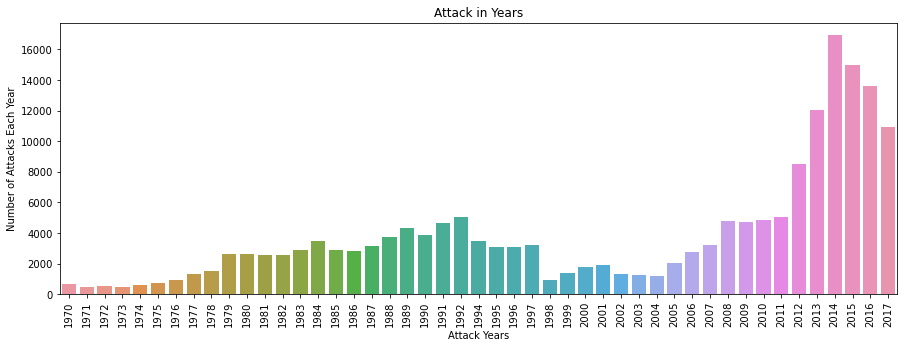

In [12]:
plt.figure(figsize=(15,5))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of Attacks Each Year")
plt.xticks(rotation=90)
sns.barplot(data['Year'].value_counts().index, data['Year'].value_counts().values)
plt.show()

### 2. Top terrorism affected countries

In [13]:
data['Country'].value_counts()[0:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

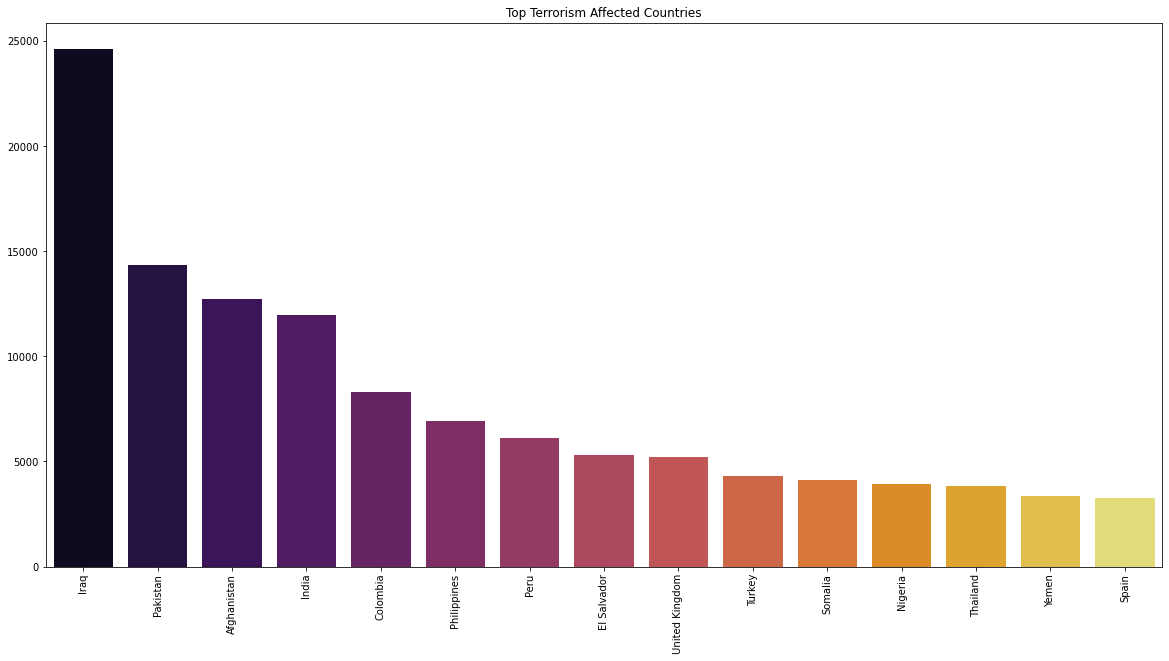

In [14]:
plt.figure(figsize=(20,10))
plt.title("Top Terrorism Affected Countries")
plt.xticks(rotation=90)
sns.barplot(data['Country'].value_counts()[0:15].index, data['Country'].value_counts()[0:15].values, palette='inferno')
plt.show()

### 3. Terrorism by region

In [15]:
data['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

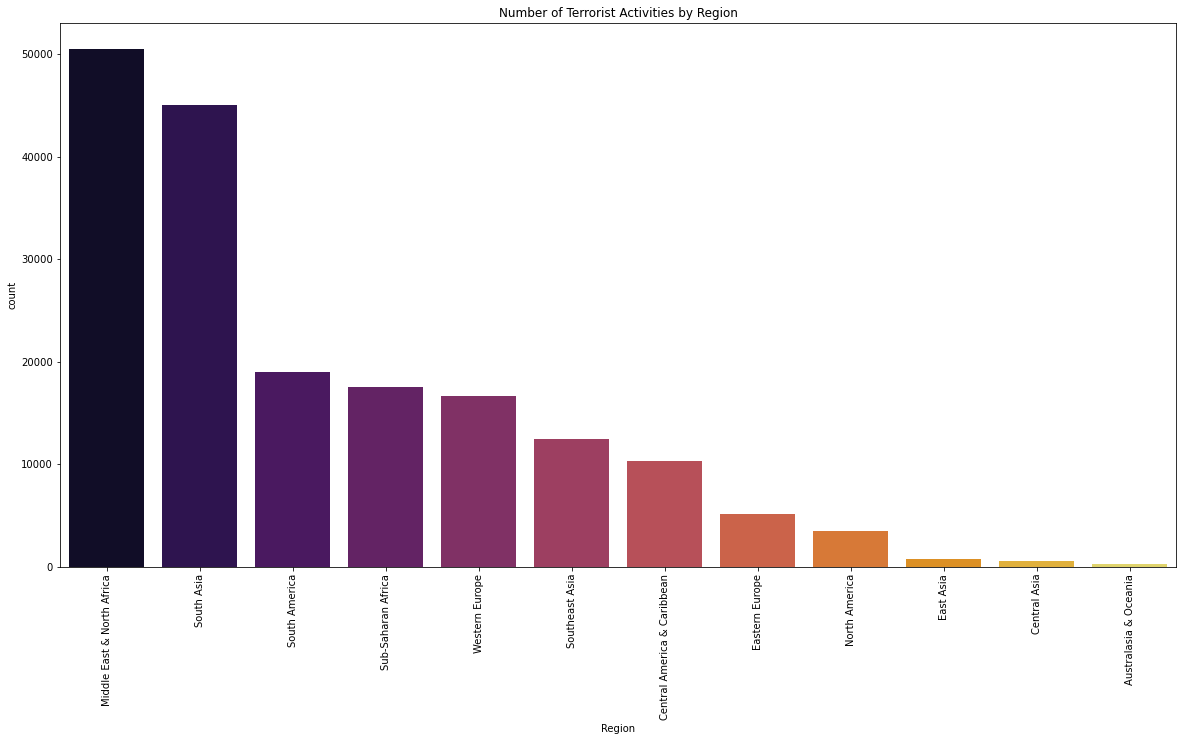

In [16]:
plt.figure(figsize=(20,10))
plt.title("Number of Terrorist Activities by Region")
plt.xticks(rotation=90)
sns.countplot(data['Region'], palette='inferno', order=data['Region'].value_counts().index)
plt.show()

### 4. Attack methods by terrorists

In [17]:
data['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

In [18]:
data['AttackType'].value_counts().shape

(9,)

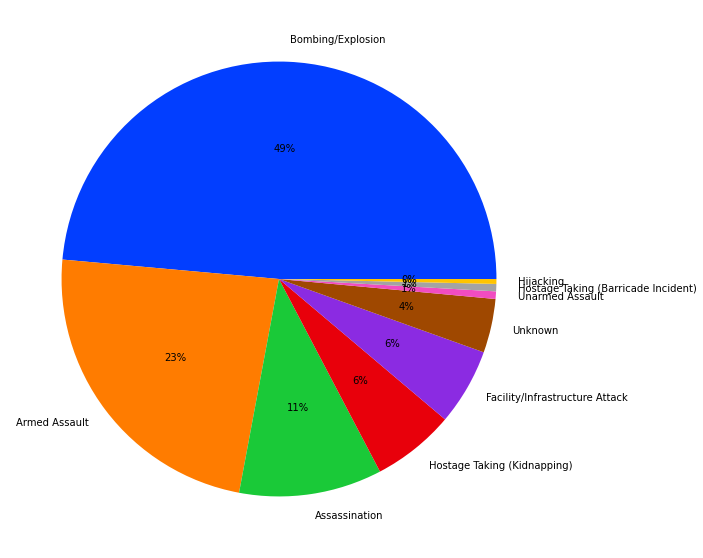

In [19]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('bright')[0:9]
plt.pie(data['AttackType'].value_counts().values, labels = data['AttackType'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.show()

### 5. Favorite targets

In [20]:
data['Target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

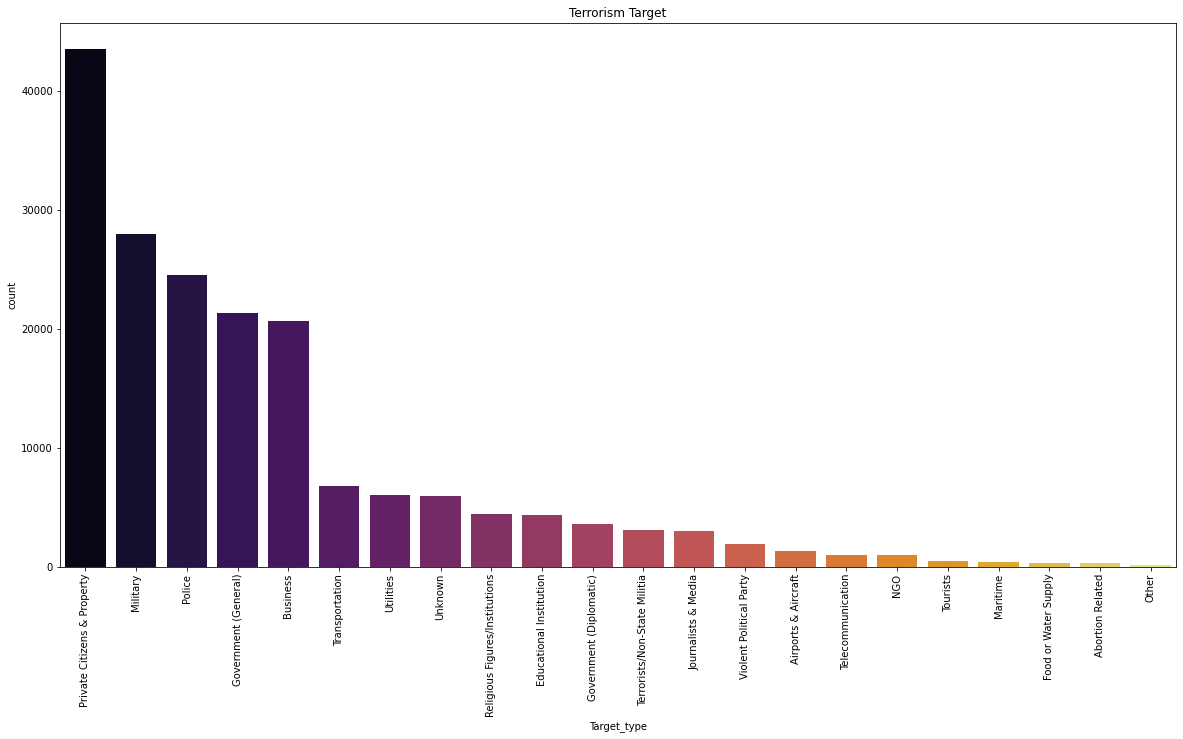

In [21]:
plt.figure(figsize=(20,10))
plt.title("Terrorism Target")
plt.xticks(rotation=90)
sns.countplot(data['Target_type'], palette='inferno', order=data['Target_type'].value_counts().index)
plt.show()

### 6. Trend in terrorist activities

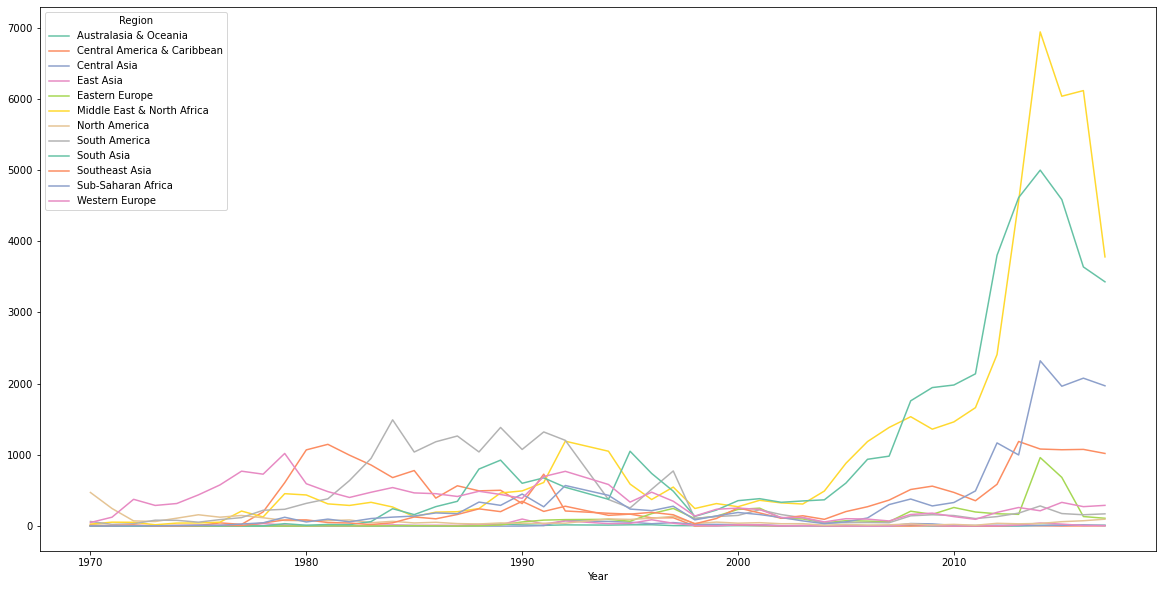

In [22]:
Year_region=pd.crosstab(data.Year,data.Region)
Year_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

### 7. Global terrorist attacks

In [23]:
geog = pd.DataFrame({'country':data['Country'].value_counts().index,
                    'attacks':data['Country'].value_counts().values})

In [24]:
geog

,country,attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,Andorra,1
201,North Korea,1
202,Antigua and Barbuda,1
203,Wallis and Futuna,1


In [26]:
fig = px.choropleth(geog, locations="country", 
                    locationmode='country names', color="attacks", 
                    hover_name="country", range_color=[1, 1000], 
                    color_continuous_scale="blues", 
                    title='Number of terrorist attacks by country')
fig.update(layout_coloraxis_showscale=True)
fig.show()

# Step3 Results and analysis

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. Based on visualization, the number of terrorism is increasing generally, and it has sharply jump from 2012. The middle east and north Africa region has the most number of terrorist activities which is 50474 in the past 46 years, and the Australasia and Oceania region has the least number of terrorist activities which is 282 incidents. Among of the mainly nine different attack methods, bombing/explosion is the most common attack method chosen by terrorists, 49% terrorist activities are related of bobming/explosion. Terrorists' favorate targets are private citizens and property. According to the trend in terrorist activities by years, we can see Middle-East, North Africa, South Asia have seen a shoot in the number of terrorist activities over the years. Irap has witnessed a very large number of terrorist activities followed by Pakistan.  

# Step4 Conclusion

In this study, I used matplotlib.pyplot, seaborn, and plotly.express functions to visualize the dataset. In the further study, I would like to try Altair to deal with my datasets. I learned the Altair function in this course, which is a powerful expressive tool to build visualizations. I am planning study the terrorism happened in the specific country, such as in American. And training existing data to built a regression model to predict the possibility of terrorist attack.